[47.   41.   38.5  37.5  37.25 37.5  39.  ]

Angle of prism and Refractive index of the prism from fitting:
 [1.04579575 1.50106945] 

[47.01860351 46.41513369 45.86531544 45.3603979  44.89377642 44.46032214
 44.05595883 43.677384   43.32187829 42.98717135 42.67134485 42.37276088
 42.09000809 41.82186035 41.56724471 41.32521609 41.09493709 40.87566181
 40.66672255 40.46751898 40.27750911 40.09620181 39.92315046 39.75794763
 39.60022054 39.44962716 39.30585287 39.16860753 39.03762307 38.91265117
 38.79346144 38.67983972 38.57158654 38.46851586 38.37045389 38.27723803
 38.18871596 38.10474482 38.02519042 37.94992661 37.87883465 37.81180268
 37.74872518 37.68950259 37.63404082 37.58225094 37.53404878 37.48935468
 37.44809315 37.41019262 37.37558521 37.34420649 37.31599529 37.29089351
 37.26884591 37.24979999 37.23370581 37.22051587 37.21018497 37.20267007
 37.19793021 37.19592639 37.19662145 37.19998001 37.20596837 37.21455443
 37.22570761 37.23939877 37.25560019 37.27428542 37.29542933 3

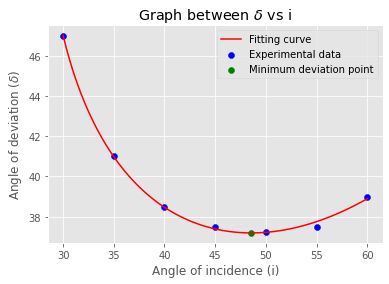

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
def rad(x):
    return (x * np.pi/180)

def func(i,A,n):
    return i - A + np.arcsin(n * np.sin(A - np.arcsin(np.sin(i)/n)))

def min_dev(y_cal,xlim):
    list = []
    for j in range(len(y_cal)):
        xlim[j]
        if y_cal[j] == np.min(y_cal):
            list.append(xlim[j])
            list.append(np.min(y_cal))
    mini = np.array(list)
    print("\nCoordinates of minima of the graph (x,y):\n",mini)
    print("Angle of minimum deviation from Graph is:\n",min(y_cal)) 
    return mini
    

if __name__ == "__main__":
    datax = np.array([30,35,40,45,50,55,60])
    mean_dev_deg = np.array([47,41,38,37,37,37,39])
    mean_dev_min = np.array([0,0,30,30,15,30,0])
    datay= np.array((mean_dev_deg) + (mean_dev_min/60))
    xlim = np.linspace(30,60,100)
    print(datay) 
    popt, pcov = curve_fit(func,rad(datax),rad(datay))
    print("\nAngle of prism and Refractive index of the prism from fitting:\n",popt,"\n")
    y_cal = np.array(func(rad(xlim),*popt)) * 180/np.pi
    print(y_cal)
    mini = min_dev(y_cal,xlim)
    fig1, ax1 = plt.subplots() 
    plt.style.use("ggplot")
    plt.title("Graph between $\delta$ vs i")
    ax1.set_xlabel('Angle of incidence (i)')
    ax1.set_ylabel('Angle of deviation ($\delta$)')
    ax1.scatter(datax,datay,color = "b",label = "Experimental data")
    ax1.scatter(mini[0],mini[1],c = "g",label = "Minimum deviation point")
    ax1.plot(xlim,np.array(func(rad(xlim),*popt) * 180/np.pi), color = "r",label = "Fitting curve")
    plt.legend()
    plt.show()
